In [3]:
import matplotlib
import numpy as np
import pickle
import learn2learn as l2l
from torch import nn
import torch
import os
import matplotlib.pyplot as plt

In [154]:
class myModel(nn.Module):
    def __init__(self):
        super(myModel, self).__init__()
        self.x = nn.Linear(5,5)
        self.relu = nn.ReLU()
        self.y = nn.Linear(5,1)
    def forward(self, data):
        output = self.y(self.relu(self.x(data)))
        return output

In [169]:
model = myModel()

In [170]:
myMamlModel = l2l.algorithms.MAML(model, lr = 0.01)

In [171]:
def get_activations(name, activations_dict):
    def hook_fn(module, layer_in, output):
        activations_dict[name] = output.detach()
    return hook_fn 

In [201]:
fake_input = torch.Tensor([2,2,7,8,5])

In [173]:
# register forward hooks on normal module
hooks = {}
activations = {}
for name, module in model.named_modules():
    hook = module.register_forward_hook(get_activations(name, activations))
    hooks[name] = hook

In [174]:
# register forward hooks on maml module
maml_activations = {}
for name, module in myMamlModel.named_modules():
    hook = module.register_forward_hook(get_activations(name, maml_activations))
    hooks[name] = hook

In [204]:
model(fake_input)

tensor([-0.2612], grad_fn=<AddBackward0>)

In [205]:
myMamlModel(fake_input)

tensor([-0.2612], grad_fn=<AddBackward0>)

In [206]:
activations

{'x': tensor([ 6.1381, -5.3891, -3.2617,  1.8646,  1.7858]),
 'relu': tensor([6.1381, 0.0000, 0.0000, 1.8646, 1.7858]),
 'y': tensor([-0.2612]),
 '': tensor([-0.2612])}

In [207]:
maml_activations

{'module.x': tensor([ 6.1381, -5.3891, -3.2617,  1.8646,  1.7858]),
 'module.relu': tensor([6.1381, 0.0000, 0.0000, 1.8646, 1.7858]),
 'module.y': tensor([-0.2612]),
 'module': tensor([-0.2612]),
 '': tensor([-0.2612])}

In [202]:
learner = myMamlModel.clone()
# register forward hooks on maml module
learner_activations = {}
for name, module in learner.named_modules():
    hook = module.register_forward_hook(get_activations(name, learner_activations))
    hooks[name] = hook

In [203]:
fake_input2 = torch.Tensor([1,1,1,1,1])

In [208]:
learner(fake_input2)

tensor([0.1260], grad_fn=<AddBackward0>)

In [210]:
activations

{'x': tensor([ 1.0580, -0.8074, -0.2502,  0.5279,  0.0780]),
 'relu': tensor([1.0580, 0.0000, 0.0000, 0.5279, 0.0780]),
 'y': tensor([0.1260]),
 '': tensor([0.1260])}

In [211]:
maml_activations

{'module.x': tensor([ 1.0580, -0.8074, -0.2502,  0.5279,  0.0780]),
 'module.relu': tensor([1.0580, 0.0000, 0.0000, 0.5279, 0.0780]),
 'module.y': tensor([0.1260]),
 'module': tensor([0.1260]),
 '': tensor([-0.2612])}

In [213]:
learner_activations

{'module.x': tensor([ 1.0580, -0.8074, -0.2502,  0.5279,  0.0780]),
 'module.relu': tensor([1.0580, 0.0000, 0.0000, 0.5279, 0.0780]),
 'module.y': tensor([0.1260]),
 'module': tensor([0.1260]),
 '': tensor([0.1260])}

In [8]:
os.listdir('histogram_output')

['act_func', '0_Dropout(p=0.2, inplace=False)', '2_ReLU()']

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log1p


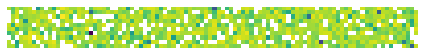

In [39]:
def get_hist(h): return torch.stack(h).t().float().log1p()

myActivations = [np.random.randn(100) for _ in range(10)]
myActivations = [np.log1p(x) for x in myActivations]
plt.imshow(myActivations, origin='lower')
plt.axis('off')
plt.tight_layout()

In [ ]:
percentage_dict = {}
THRESHOLD = .03

for directory in os.listdir('histogram_output'):
    curr_path = os.path.join('histogram_output', directory)
    percentages = []
    print(curr_path)
    for i, file in enumerate(os.listdir(curr_path)):
        if i == len(os.listdir(curr_path)) - 1: continue # skip last pickle file as was corrupted during write
        with open(os.path.join(curr_path, file), 'rb') as handle:
            curr_acts = pickle.load(handle)
            for sub_list in curr_acts:
                num_left = [x for x in sub_list if x <= THRESHOLD]
                ratio = len(num_left) * 1.0/len(sub_list)
                percentages.append(ratio)
        
    percentage_dict[curr_path] = percentages

histogram_output/act_func


In [45]:
for key in percentage_dict.keys():
    print(key)
    fig, ax = plt.subplots()
    ax.plot(percentage_dict[key])

225300
476100
476100
476100
221100
486300
486300
486300
219900
570900
570900
570900
261900
569100
569100
569100
264000
536700
536700
536700
248100
408900
408900
408900
192900
365100
365100
365100
179700
438900
438900
438900
204600
542100
542100
542100
246900
525300
525300
525300
236700
536100
536100
536100
242700
546900
546900
546900
248400
554100
554100
554100
253200
596100
596100
596100
269700
507900
507900
507900
232800
489300
489300
489300
226500
537300
537300
537300
247800
543900
543900
543900
250200
597300
597300
597300
273000
566100
566100
566100
258600
568500
568500
568500
260100
559500
559500
559500
254400
570300
570300
570300
261300
515700
515700
515700
239700
517500
517500
517500
238800
489900
489900
489900
226800
501300
501300
501300
225900
481500
481500
481500
216300
442500
442500
442500
195300
626100
626100
626100
290400
406500
406500
406500
190200
372300
372300
372300
177300
579900
579900
579900
267300
552900
552900
552900
253800
491100
491100
491100
227100
607500
607500

In [4]:
with open('percentage_dict.pickle', 'rb') as handle:
    percentage_dict = pickle.load(handle)

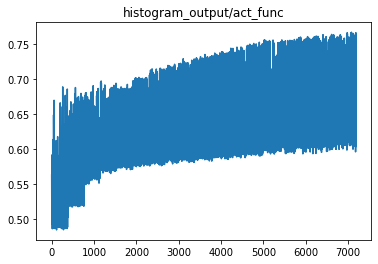

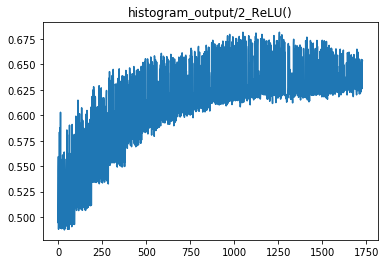

In [13]:
for key in percentage_dict.keys():
    if 'Dropout' in key: continue
    fig, ax = plt.subplots()
    ax.plot(percentage_dict[key])
    ax.set_title(key)